In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import cv2

In [2]:
animal_df = keras.preprocessing.image_dataset_from_directory(
    './Animal Image Dataset-Cats, Dogs, and Foxes',
    shuffle=True,
    image_size=(150,150),
)

Found 308 files belonging to 3 classes.


In [3]:
classes = animal_df.class_names
classes

['cat', 'dog', 'fox']

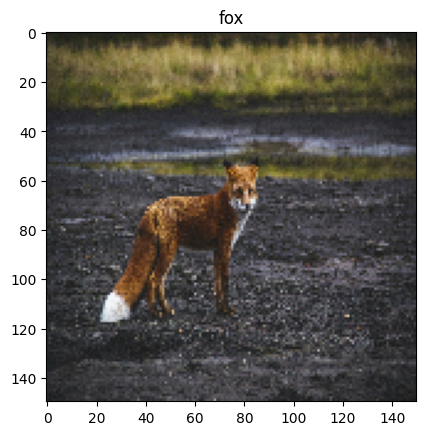

In [4]:
for image_batch, label_batch in animal_df.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    plt.title(classes[label_batch[1]])

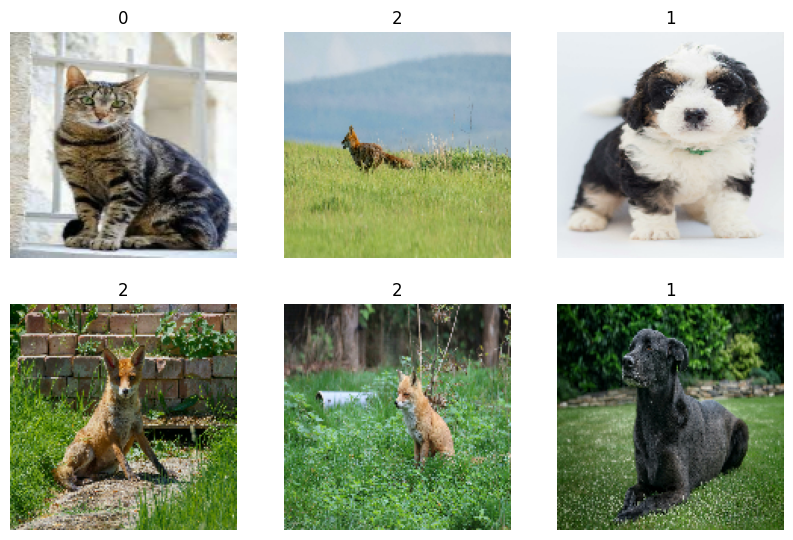

In [5]:
plt.figure(figsize=(10, 10)) 
for images, labels in animal_df.take(1): 
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8")) 
        plt.title(int(labels[i])) 
        plt.axis("off") 
plt.show()

In [6]:
len(animal_df)

10

In [7]:
train_size=int(len(animal_df)*0.7)
test_size = int(len(animal_df)*0.1)
val_size = int(len(animal_df)*0.2)
print(train_size, test_size, val_size)

7 1 2


In [8]:
train = animal_df.take(train_size)
val = animal_df.skip(train_size).take(val_size)
test = animal_df.skip(train_size + val_size).take(test_size)
print(train)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Model

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')])
model.summary()

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,323 (9.25 MB)

 Trainable params: 2,424,323 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train,
    epochs=10,
    validation_data=val
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.3587 - loss: 390.2047 - val_accuracy: 0.2188 - val_loss: 12.8074
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.3385 - loss: 7.9466 - val_accuracy: 0.4531 - val_loss: 1.0060
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.4637 - loss: 1.0076 - val_accuracy: 0.5938 - val_loss: 0.8499
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.5943 - loss: 0.8691 - val_accuracy: 0.7812 - val_loss: 0.5763
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.7574 - loss: 0.5517 - val_accuracy: 0.8281 - val_loss: 0.4587
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.8590 - loss: 0.3929 - val_accuracy: 0.9531 - val_loss: 0.3060
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.9447 - loss: 0.2073 - val_accuracy: 0.9688 - val_loss: 0.1836
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.8787 - loss: 0.3917 - val_accuracy: 0.9219 - val_loss: 0.2091
Epoch

In [23]:
score = model.evaluate(test)
score

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.8500 - loss: 0.2534


[0.25343894958496094, 0.8500000238418579]

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

[]

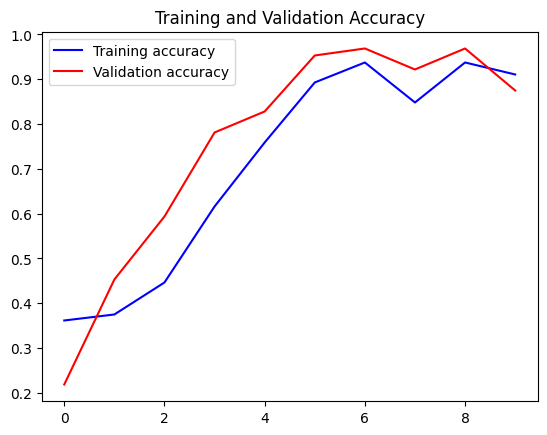

In [15]:
plt.plot( acc, 'b', label='Training accuracy')
plt.plot( val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.plot()

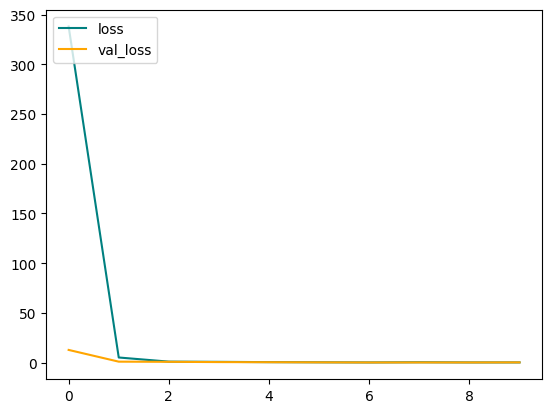

In [16]:
plt.plot(loss, color='teal', label='loss')
plt.plot(val_loss, color='orange', label='val_loss')
plt.legend(loc="upper left")
plt.show()

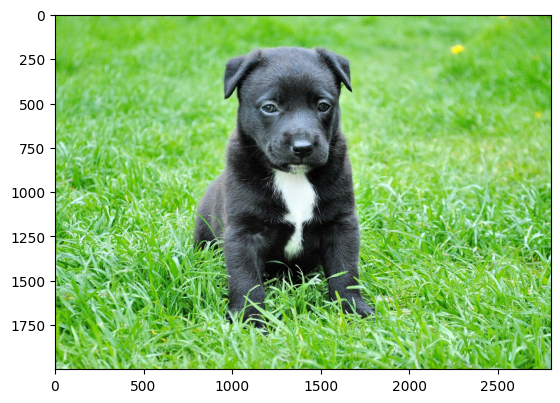

In [17]:

image = cv2.imread("./Animal Image Dataset-Cats, Dogs, and Foxes/dog/dog034.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

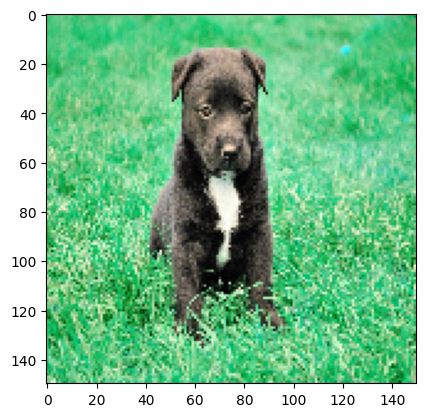

In [18]:
resize = tf.image.resize(image, (150,150)) 
plt.imshow(resize.numpy().astype('int'))
plt.show()

In [19]:
resize.shape

TensorShape([150, 150, 3])

In [27]:
prediction = model.predict(np.expand_dims(resize, 0))
animals = ['cat', 'dog', 'fox']
prediction_idx = np.argmax(prediction, axis=1)[0]
animal = animals[prediction_idx]
print(animal)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
dog


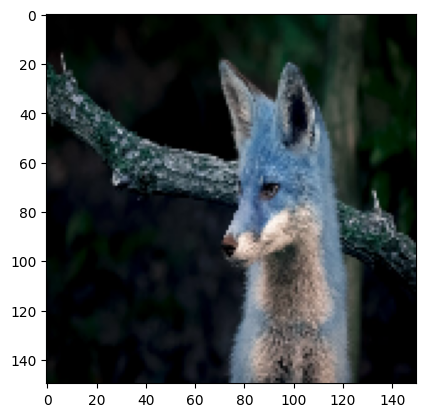

In [46]:
#second prediction
image = cv2.imread("./fox.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
resize = tf.image.resize(image, (150,150)) 
plt.imshow(resize.numpy().astype('int'))
plt.show()

In [48]:
prediction = model.predict(np.expand_dims(resize, 0))
animals = ['cat', 'dog', 'fox']
prediction_idx = np.argmax(prediction, axis=1)[0]
animal = animals[prediction_idx]
print(animal)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
fox
